In [1]:

%run ../../load_magic/storage.py
%run ../../load_magic/dataframes.py
%pprint
%who

DATA_FOLDER: ../data/
SAVES_FOLDER: ../saves/
Pretty printing has been turned OFF
DATA_FOLDER	 ENCODING_TYPE	 SAVES_FOLDER	 attempt_to_pickle	 example_iterrows	 get_column_descriptions	 load_csv	 load_dataframes	 load_object	 
math	 os	 pd	 pickle	 save_dataframes	 store_objects	 


In [2]:

file_name = r'../data/html/Ethnic_and_Cultural_diversity.html'
fearon_df = pd.read_html(file_name)[0]
fearon_df.columns = ['Ethnic_diversity_rank', 'Country', 'Ethnic_fractionalization_index',
                     'Cultural_diversity_index']
fearon_df.sample(10).T

,34,31,38,89,90,67,135,70,6,111
Ethnic_diversity_rank,35,32,39,90,91,68,136,71,7,112
Country,Zambia,Bolivia,Kuwait,Morocco,Oman,Bahrain,Egypt,Mexico,Togo,Romania
Ethnic_fractionalization_index,0.726,0.743,0.708,0.479,0.439,0.551,0.164,0.542,0.883,0.3
Cultural_diversity_index,0.189,0.662,0.54,0.36,0.404,0.46,0,0.434,0.602,0.265


In [3]:

file_name = r'../data/html/Ethnic_Linguistic_and_Religious_Fractionalization.html'
alesina_df = pd.read_html(file_name)[0]
alesina_df.columns = ['Fractionalization_rank', 'Country', 'Ethnic_fractionalization',
                      'Linguistic_fractionalization', 'Religious_fractionalization']
alesina_df.sample(10).T

,85,125,167,117,161,47,152,191,64,23
Fractionalization_rank,86,126,168,118,162,48,153,192,65,24
Country,Hungary,Mauritius,Sao Tome and Principe,Madagascar,Russian Federation,Cyprus,Paraguay,Thailand,France,Bolivia
Ethnic_fractionalization,0.1522,0.4634,0,0.8791,0.2452,0.0939,0.1689,0.6338,0.1032,0.7396
Linguistic_fractionalization,0.0297,0.4547,0.2322,0.0204,0.2485,0.3962,0.5975,0.6344,0.1221,0.224
Religious_fractionalization,0.5244,0.6385,0.1866,0.5191,0.4398,0.3962,0.2123,0.0994,0.4029,0.2085


In [4]:

file_name = r'../data/html/UNODC_murder_rates.html'
unodc_df = pd.read_html(file_name)[0]
unodc_df.columns = ['Country', 'Murder_rate', 'Murder_count', 'Region', 'Subregion', 'Year_listed',
                    'UNODC_notes']
unodc_df.sample(10).T

,84,111,175,13,34,97,54,216,87,160
Country,Mexico,Hong Kong,United Kingdom,Seychelles,Tunisia,Ecuador,Sierra Leone,Samoa,Bermuda (UK),Poland
Murder_rate,16.35,0.3,0.92,2.15,3.05,8.23,1.92,3.15,6.45,0.74
Murder_count,20762,22,594,2,332,1309,124,6,4,286
Region,Americas,Asia,Europe,Africa,Africa,Americas,Africa,Oceania,Americas,Europe
Subregion,Central America,Eastern Asia,Northern Europe,Eastern Africa,Northern Africa,South America,Western Africa,Polynesia,Northern America,Eastern Europe
Year_listed,2015,2015,2014,2010,2012,2014,2015,2013,2015,2015
UNODC_notes,notes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:

file_name = r'../data/html/List_of_countries_by_estimated_number_of_guns_per_capita.html'
karp_df = pd.read_html(file_name)[0]
karp_df.columns = ['Gun_rank', 'Country', 'Guns_per_100_residents', 'Karp_notes']
karp_df.sample(10).T

,110,111,94,129,55,139,99,15,131,13
Gun_rank,110,111,94,129,56,139,99,16,131,14
Country,Syria,Turkmenistan,Bahamas,Trinidad and Tobago,Jordan,Ecuador,China,Bahrain,Nigeria,Finland
Guns_per_100_residents,3.9,3.8,5.3,1.6,11.5,1.3,4.9,24.8,1.5,27.3
Karp_notes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5 million guns in 2016 in the official regis...


In [6]:

sorted(list(set(fearon_df['Country']) ^ set(alesina_df['Country'])))

['American Samoa', 'Andorra', 'Antigua and Barbuda', 'Aruba', 'Bahamas', 'Barbados', 'Belize', 'Bermuda', 'Brunei', 'Cape Verde', 'Comoros', 'Czechoslovakia (1918â\x80\x931992)', 'Dominica', 'East Timor', 'Equatorial Guinea', 'Faroe Islands', 'French Guiana', 'French Polynesia', 'Gambia', 'Gambia, The', 'Gaza Strip', 'Greenland', 'Grenada', 'Guadeloupe', 'Guam', 'Hong Kong', 'Iceland', 'Isle of Man', 'Jersey', 'Kingdom of Yugoslavia (1918â\x80\x931943)', 'Kiribati', 'Korea, North', 'Korea, South', 'Liechtenstein', 'Luxembourg', 'Macau', 'Malta', 'Marshall Islands', 'Martinique', 'Mayotte', 'Micronesia', 'Monaco', 'Nauru', 'Netherlands Antilles', 'New Caledonia', 'North Korea', 'Northern Mariana Islands', 'Palau', 'Puerto Rico', 'Qatar', 'Reunion', 'Russia', 'Russian Federation', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'San Marino', 'Sao Tome and Principe', 'Serbia', 'Seychelles', 'Slovak Republic', 'Slovakia', 'Solomon Islands', 'South Korea', 'Sovie

In [7]:

sorted(list(set(fearon_df['Country']) ^ set(unodc_df['Country'])))

['Andorra', 'Anguilla (UK)', 'Antigua and Barbuda', 'Aruba (Netherlands)', 'Bahamas', 'Barbados', 'Belize', 'Bermuda (UK)', 'British Virgin Islands (UK)', 'Brunei', 'Burma', 'Cape Verde', 'Cayman Islands (UK)', 'Comoros', 'Congo', 'Cook Islands', 'Czechoslovakia (1918â\x80\x931992)', 'Democratic Republic of Congo', 'Democratic Republic of the Congo', 'Dominica', 'East Timor', 'Equatorial Guinea', 'French Guiana (France)', 'French Polynesia (France)', 'Greenland (Denmark)', 'Grenada', 'Guadeloupe (France)', 'Guam (US)', 'Hong Kong', 'Iceland', 'Kingdom of Yugoslavia (1918â\x80\x931943)', 'Kiribati', 'Kosovo', 'Liechtenstein', 'Luxembourg', 'Macao', 'Maldives', 'Malta', 'Marshall Islands', 'Martinique (France)', 'Mayotte (France)', 'Micronesia, Fed. Sts.', 'Monaco', 'Montenegro', 'Montserrat (UK)', 'Myanmar', 'Nauru', 'New Caledonia (France)', 'Niue', 'Palau', 'Palestine', 'Puerto Rico (US)', 'Qatar', 'Republic of the Congo', 'RÃ©union (France)', 'Saint Kitts and Nevis', 'Saint Lucia', '

In [8]:

sorted(list(set(fearon_df['Country']) ^ set(karp_df['Country'])))

['Bahamas', 'Barbados', 'Belize', 'Brunei', 'Burma', 'Cape Verde', 'Comoros', 'Czechoslovakia (1918â\x80\x931992)', "CÃ´te d'Ivoire", 'Democratic Republic of Congo', 'Democratic Republic of the Congo', 'Equatorial Guinea', 'Iceland', 'Ivory Coast', 'Kingdom of Yugoslavia (1918â\x80\x931943)', 'Luxembourg', 'Macedonia', 'Maldives', 'Malta', 'Montenegro', 'Myanmar', 'Palestine', 'Qatar', 'Republic of China (Taiwan)', 'Republic of Macedonia', 'Serbia', 'Seychelles', 'Solomon Islands', 'Soviet Union (1922â\x80\x931991)', 'Sudan (1955â\x80\x932011)', 'Sudan South Sudan', 'Suriname', 'Taiwan', 'Timor-Leste', 'Transnistria', 'World', 'Yugoslavia (1943â\x80\x931992)']

In [9]:

sorted(list(set(alesina_df['Country']) ^ set(unodc_df['Country'])))

['American Samoa', 'Anguilla (UK)', 'Aruba', 'Aruba (Netherlands)', 'Bermuda', 'Bermuda (UK)', 'British Virgin Islands (UK)', 'Burma', 'Cayman Islands (UK)', 'Congo', 'Cook Islands', 'Democratic Republic of Congo', 'Democratic Republic of the Congo', 'Faroe Islands', 'French Guiana', 'French Guiana (France)', 'French Polynesia', 'French Polynesia (France)', 'Gambia', 'Gambia, The', 'Gaza Strip', 'Greenland', 'Greenland (Denmark)', 'Guadeloupe', 'Guadeloupe (France)', 'Guam', 'Guam (US)', 'Isle of Man', 'Jersey', 'Korea, North', 'Korea, South', 'Kosovo', 'Macao', 'Macau', 'Maldives', 'Martinique', 'Martinique (France)', 'Mayotte', 'Mayotte (France)', 'Micronesia', 'Micronesia, Fed. Sts.', 'Montenegro', 'Montserrat (UK)', 'Myanmar', 'Netherlands Antilles', 'New Caledonia', 'New Caledonia (France)', 'Niue', 'North Korea', 'Northern Mariana Islands', 'Palestine', 'Puerto Rico', 'Puerto Rico (US)', 'Republic of the Congo', 'Reunion', 'Russia', 'Russian Federation', 'RÃ©union (France)', 'Sai

In [10]:

sorted(list(set(alesina_df['Country']) ^ set(karp_df['Country'])))

['American Samoa', 'Andorra', 'Antigua and Barbuda', 'Aruba', 'Bermuda', 'Burma', "CÃ´te d'Ivoire", 'Democratic Republic of Congo', 'Democratic Republic of the Congo', 'Dominica', 'East Timor', 'Faroe Islands', 'French Guiana', 'French Polynesia', 'Gambia', 'Gambia, The', 'Gaza Strip', 'Greenland', 'Grenada', 'Guadeloupe', 'Guam', 'Hong Kong', 'Isle of Man', 'Ivory Coast', 'Jersey', 'Kiribati', 'Korea, North', 'Korea, South', 'Liechtenstein', 'Macau', 'Macedonia', 'Maldives', 'Marshall Islands', 'Martinique', 'Mayotte', 'Micronesia', 'Monaco', 'Montenegro', 'Myanmar', 'Nauru', 'Netherlands Antilles', 'New Caledonia', 'North Korea', 'Northern Mariana Islands', 'Palau', 'Palestine', 'Puerto Rico', 'Republic of China (Taiwan)', 'Republic of Macedonia', 'Reunion', 'Russia', 'Russian Federation', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'San Marino', 'Sao Tome and Principe', 'Slovak Republic', 'Slovakia', 'South Korea', 'Sudan', 'Sudan South Sudan', 'Taiwa

In [11]:

sorted(list(set(unodc_df['Country']) ^ set(karp_df['Country'])))

['Andorra', 'Anguilla (UK)', 'Antigua and Barbuda', 'Aruba (Netherlands)', 'Bermuda (UK)', 'British Virgin Islands (UK)', 'Cayman Islands (UK)', 'Congo', 'Cook Islands', "CÃ´te d'Ivoire", 'Dominica', 'East Timor', 'French Guiana (France)', 'French Polynesia (France)', 'Greenland (Denmark)', 'Grenada', 'Guadeloupe (France)', 'Guam (US)', 'Hong Kong', 'Ivory Coast', 'Kiribati', 'Kosovo', 'Liechtenstein', 'Macao', 'Macedonia', 'Marshall Islands', 'Martinique (France)', 'Mayotte (France)', 'Micronesia, Fed. Sts.', 'Monaco', 'Montserrat (UK)', 'Nauru', 'New Caledonia (France)', 'Niue', 'Palau', 'Puerto Rico (US)', 'Republic of China (Taiwan)', 'Republic of Macedonia', 'Republic of the Congo', 'RÃ©union (France)', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Pierre and Miquelon (France)', 'Saint Vincent and the Grenadines', 'Samoa', 'San Marino', 'Sao Tome and Principe', 'South Sudan', 'Sudan', 'Sudan South Sudan', 'Taiwan', 'Timor-Leste', 'Tonga', 'Transnistria', 'Turks and Caicos Islands

In [12]:

country_list = sorted(list(set(fearon_df['Country']) & set(alesina_df['Country']) &
                           set(unodc_df['Country']) & set(karp_df['Country'])))
country_list

['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Lithuania', 'Madagascar', 'Malawi', 'Malaysia', 'Mali', 'Mauritania', 'Mauritius', '

In [13]:

merge_df = pd.merge(left=fearon_df, right=alesina_df, how='inner', on=['Country'],
                    suffixes=('_fearon', '_alesina'))
merge_df.sample(10).T

,59,123,7,62,82,138,134,14,52,78
Ethnic_diversity_rank,65,132,8,68,89,147,143,15,57,85
Country,Belgium,Honduras,South Africa,Bahrain,Laos,Albania,Paraguay,Guinea-Bissau,Djibouti,United States
Ethnic_fractionalization_index,0.567,0.185,0.88,0.551,0.481,0.097,0.132,0.818,0.606,0.491
Cultural_diversity_index,0.462,0.167,0.53,0.46,0.02,0.082,0.039,0.568,0.404,0.271
Fractionalization_rank,19,84,179,15,107,2,153,81,51,204
Ethnic_fractionalization,0.5554,0.1867,0.7517,0.5021,0.5139,0.2204,0.1689,0.8082,0.7962,0.4901
Linguistic_fractionalization,0.5409,0.0553,0.8652,0.4344,0.6382,0.0399,0.5975,0.8141,0.6558,0.5647
Religious_fractionalization,0.2127,0.2357,0.8603,0.5528,0.5453,0.4719,0.2123,0.6128,0.0435,0.8241


In [14]:

merge_df = pd.merge(left=merge_df, right=unodc_df, how='inner', on=['Country'],
                    suffixes=('_merge', '_unodc'))
merge_df.sample(10).T

,21,71,39,131,138,76,94,85,16,61
Ethnic_diversity_rank,25,80,46,143,150,86,104,95,20,69
Country,Mozambique,Panama,Kazakhstan,Paraguay,Yemen,Georgia,Botswana,Nicaragua,Central African Republic,Iraq
Ethnic_fractionalization_index,0.765,0.507,0.664,0.132,0.078,0.49,0.351,0.402,0.791,0.549
Cultural_diversity_index,0.285,0.168,0.62,0.039,0.078,0.404,0.161,0.095,0.511,0.355
Fractionalization_rank,134,151,100,153,212,71,26,143,36,91
Ethnic_fractionalization,0.6932,0.5528,0.6171,0.1689,0,0.4923,0.4102,0.4844,0.8295,0.3689
Linguistic_fractionalization,0.8125,0.3873,0.6621,0.5975,0.008,0.4749,0.411,0.0473,0.8334,0.3694
Religious_fractionalization,0.6759,0.3338,0.5898,0.2123,0.0023,0.6543,0.5986,0.429,0.7916,0.4844
Murder_rate,3.39,11.38,4.84,9.29,6.67,2.68,10.53,11.49,13.09,8
Murder_count,849,447,853,617,1703,108,220,675,642,2628


In [15]:

merge_df = pd.merge(left=merge_df, right=karp_df, how='inner', on=['Country'],
                    suffixes=('_merge', '_karp'))
merge_df.sample(10).T

,119,96,92,109,54,31,142,70,37,1
Ethnic_diversity_rank,134,110,104,124,62,39,157,82,45,2
Country,Ireland,Czech Republic,Botswana,Bangladesh,Syria,Kuwait,Japan,Spain,Guinea,Tanzania
Ethnic_fractionalization_index,0.171,0.322,0.351,0.223,0.581,0.708,0.012,0.502,0.669,0.953
Cultural_diversity_index,0.157,0.064,0.161,0.141,0.235,0.54,0.012,0.263,0.49,0.564
Fractionalization_rank,92,49,26,16,188,106,97,180,80,191
Ethnic_fractionalization,0.1206,0.3222,0.4102,0.0454,0.5399,0.6604,0.0119,0.4165,0.7389,0.7353
Linguistic_fractionalization,0.0312,0.3233,0.411,0.0925,0.1817,0.3444,0.0178,0.4132,0.7725,0.8983
Religious_fractionalization,0.155,0.6591,0.5986,0.209,0.431,0.6745,0.5406,0.4514,0.2649,0.6334
Murder_rate,0.64,0.75,10.53,2.51,2.23,1.78,0.31,0.66,8.46,7.01
Murder_count,30,79,220,4035,463,61,395,303,1067,3746


In [16]:

merge_df['Murder_count'] = merge_df['Murder_count'].map(lambda x: int(x))

In [17]:

merge_df['Gun_rank'] = merge_df['Gun_rank'].map(lambda x: int(x))

In [18]:

merge_df['Region_code'] = pd.Categorical(merge_df['Region']).codes

In [19]:

merge_df['Subregion_code'] = pd.Categorical(merge_df['Subregion']).codes

In [20]:

merge_df = merge_df.sort_values('Linguistic_fractionalization')
merge_df['Cultural_diversity_index'] = merge_df['Cultural_diversity_index'].interpolate()

In [21]:

merge_df = merge_df.set_index(['Country'])

In [22]:

def check_4_correlation(df, column_list=None):
    if column_list is None:
        column_list = df.columns
    rows_list = []
    n = len(column_list)
    for i in range(n-1):
        first_column = column_list[i]
        max_correlation = 0.0
        max_column = first_column
        for j in range(i+1, n):
            second_column = column_list[j]

            # Assume the first column is never identical to the second column
            this_correlation = df[first_column].corr(df[second_column])
            
            if this_correlation > max_correlation:
                max_correlation = this_correlation
                max_column = second_column

        # Get input row in dictionary format; key = col_name
        if first_column != max_column:
            row_dict = {}
            row_dict['first_column'] = first_column
            row_dict['second_column'] = max_column
            row_dict['max_correlation'] = max_correlation

            rows_list.append(row_dict)

    column_list = ['first_column', 'second_column', 'max_correlation']
    column_correlations_df = pd.DataFrame(rows_list, columns=column_list)

    return column_correlations_df

In [23]:

dtype_df = get_column_descriptions(merge_df)
dtype_df

,column_name,dtype,count_blanks,count_uniques,count_zeroes,has_dates,only_integers
0,Region_code,int8,0,5,43,True,True
1,Subregion_code,int8,0,20,2,True,True
2,Ethnic_diversity_rank,int64,0,143,0,True,True
3,Fractionalization_rank,int64,0,143,0,True,True
4,Murder_count,int64,0,135,0,True,True
5,Year_listed,int64,0,6,0,True,True
6,Gun_rank,int64,0,142,0,True,True
7,Ethnic_fractionalization_index,float64,0,132,0,True,False
8,Cultural_diversity_index,float64,0,120,6,True,False
9,Ethnic_fractionalization,float64,0,141,1,True,False


In [24]:

match_series = (dtype_df['only_integers'].isnull())
numeric_columns = dtype_df[~match_series]['column_name'].tolist()
column_correlations_df = check_4_correlation(merge_df, column_list=numeric_columns)
column_correlations_df.sort_values('max_correlation', ascending=False)

,first_column,second_column,max_correlation
7,Ethnic_fractionalization_index,Ethnic_fractionalization,0.830909
8,Cultural_diversity_index,Linguistic_fractionalization,0.692981
9,Ethnic_fractionalization,Linguistic_fractionalization,0.679794
0,Region_code,Ethnic_diversity_rank,0.466551
10,Linguistic_fractionalization,Religious_fractionalization,0.329715
4,Murder_count,Murder_rate,0.295284
6,Gun_rank,Linguistic_fractionalization,0.266125
1,Subregion_code,Guns_per_100_residents,0.230024
2,Ethnic_diversity_rank,Guns_per_100_residents,0.198176
5,Year_listed,Guns_per_100_residents,0.152292


C:\Users\dev\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


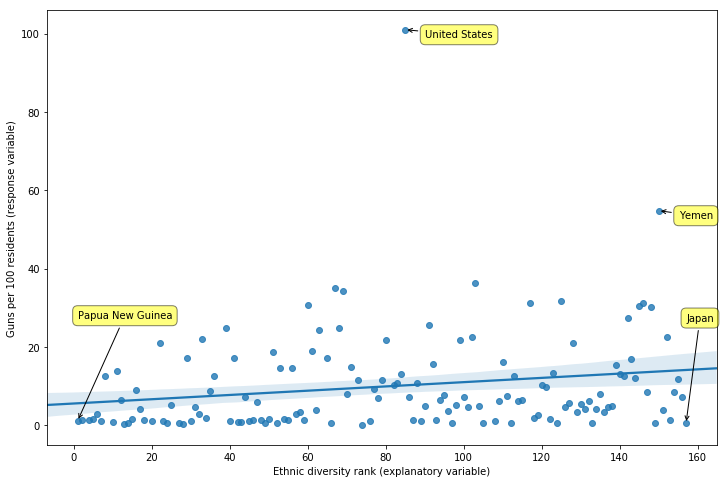

In [25]:

# First order (linear) scatterplot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig1_fig = plt.figure(figsize=(12,8))
scatter_kws = dict(facecolors=merge_df['Subregion_code'])
merge_axes_subplot = sns.regplot(x='Ethnic_diversity_rank', y='Guns_per_100_residents',
                                 scatter=True, data=merge_df)
xlabel_text = plt.xlabel('Ethnic diversity rank (explanatory variable)')
ylabel_text = plt.ylabel('Guns per 100 residents (response variable)')
kwargs = dict(textcoords='offset points', ha='left', va='bottom',
              bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
              arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
diversest_ethnicity = merge_df['Ethnic_diversity_rank'].min()
purest_ethnicity = merge_df['Ethnic_diversity_rank'].max()
for label, x, y in zip(merge_df.index, merge_df['Ethnic_diversity_rank'],
                       merge_df['Guns_per_100_residents']):
    if (y > 50):
        annotation = plt.annotate(label, xy=(x, y), xytext=(20, -10), **kwargs)
    if (x == diversest_ethnicity):
        annotation = plt.annotate(label, xy=(x, y), xytext=(0, 100), **kwargs)
    if (x == purest_ethnicity):
        annotation = plt.annotate(label, xy=(x, y), xytext=(0, 100), **kwargs)

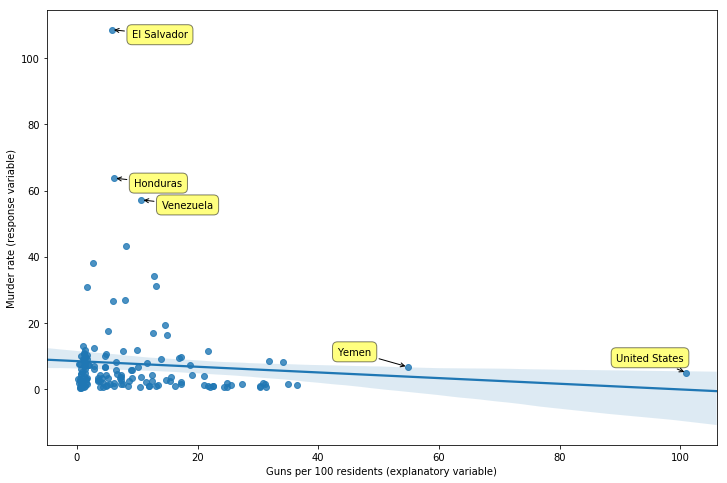

In [26]:

# First order (linear) scatterplot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig1_fig = plt.figure(figsize=(12,8))
merge_axes_subplot = sns.regplot(x='Guns_per_100_residents', y='Murder_rate',
                                 scatter=True, data=merge_df)
xlabel_text = plt.xlabel('Guns per 100 residents (explanatory variable)')
ylabel_text = plt.ylabel('Murder rate (response variable)')
kwargs = dict(textcoords='offset points', ha='left', va='bottom',
              bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
              arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
for label, x, y in zip(merge_df.index, merge_df['Guns_per_100_residents'],
                       merge_df['Murder_rate']):
    if (y > 50):
        annotation = plt.annotate(label, xy=(x, y), xytext=(20, -10), **kwargs)
    if (x > 50):
        annotation = plt.annotate(label, xy=(x, y), xytext=(-70, 10), **kwargs)

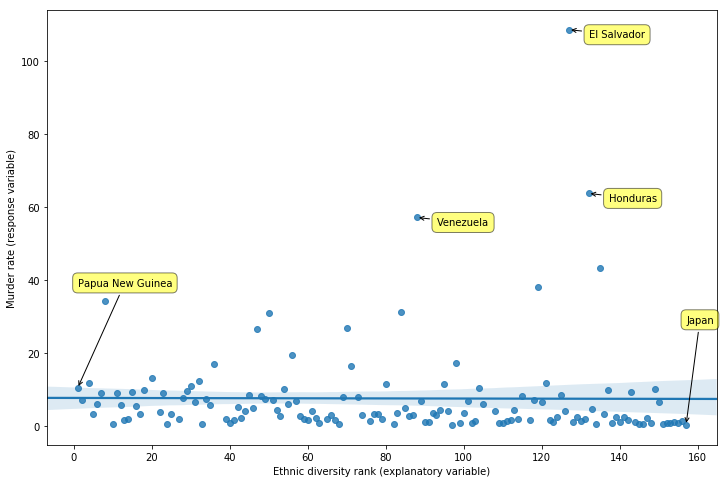

In [27]:

# First order (linear) scatterplot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig1_fig = plt.figure(figsize=(12,8))
merge_axes_subplot = sns.regplot(x='Ethnic_diversity_rank', y='Murder_rate',
                                 scatter=True, data=merge_df)
xlabel_text = plt.xlabel('Ethnic diversity rank (explanatory variable)')
ylabel_text = plt.ylabel('Murder rate (response variable)')
kwargs = dict(textcoords='offset points', ha='left', va='bottom',
              bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
              arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
diversest_ethnicity = merge_df['Ethnic_diversity_rank'].min()
purest_ethnicity = merge_df['Ethnic_diversity_rank'].max()
for label, x, y in zip(merge_df.index, merge_df['Ethnic_diversity_rank'],
                       merge_df['Murder_rate']):
    if (y > 50):
        annotation = plt.annotate(label, xy=(x, y), xytext=(20, -10), **kwargs)
    if (x == diversest_ethnicity):
        annotation = plt.annotate(label, xy=(x, y), xytext=(0, 100), **kwargs)
    if (x == purest_ethnicity):
        annotation = plt.annotate(label, xy=(x, y), xytext=(0, 100), **kwargs)

In [28]:

numeric_columns.remove('Year_listed')
numeric_columns.remove('Gun_rank')
numeric_columns.remove('Region_code')
numeric_columns.remove('Subregion_code')
numeric_columns.remove('Murder_count')
numeric_columns.remove('Ethnic_diversity_rank')
numeric_columns.remove('Fractionalization_rank')
numeric_columns.remove('Ethnic_fractionalization')
print(numeric_columns)

['Ethnic_fractionalization_index', 'Cultural_diversity_index', 'Linguistic_fractionalization', 'Religious_fractionalization', 'Murder_rate', 'Guns_per_100_residents']


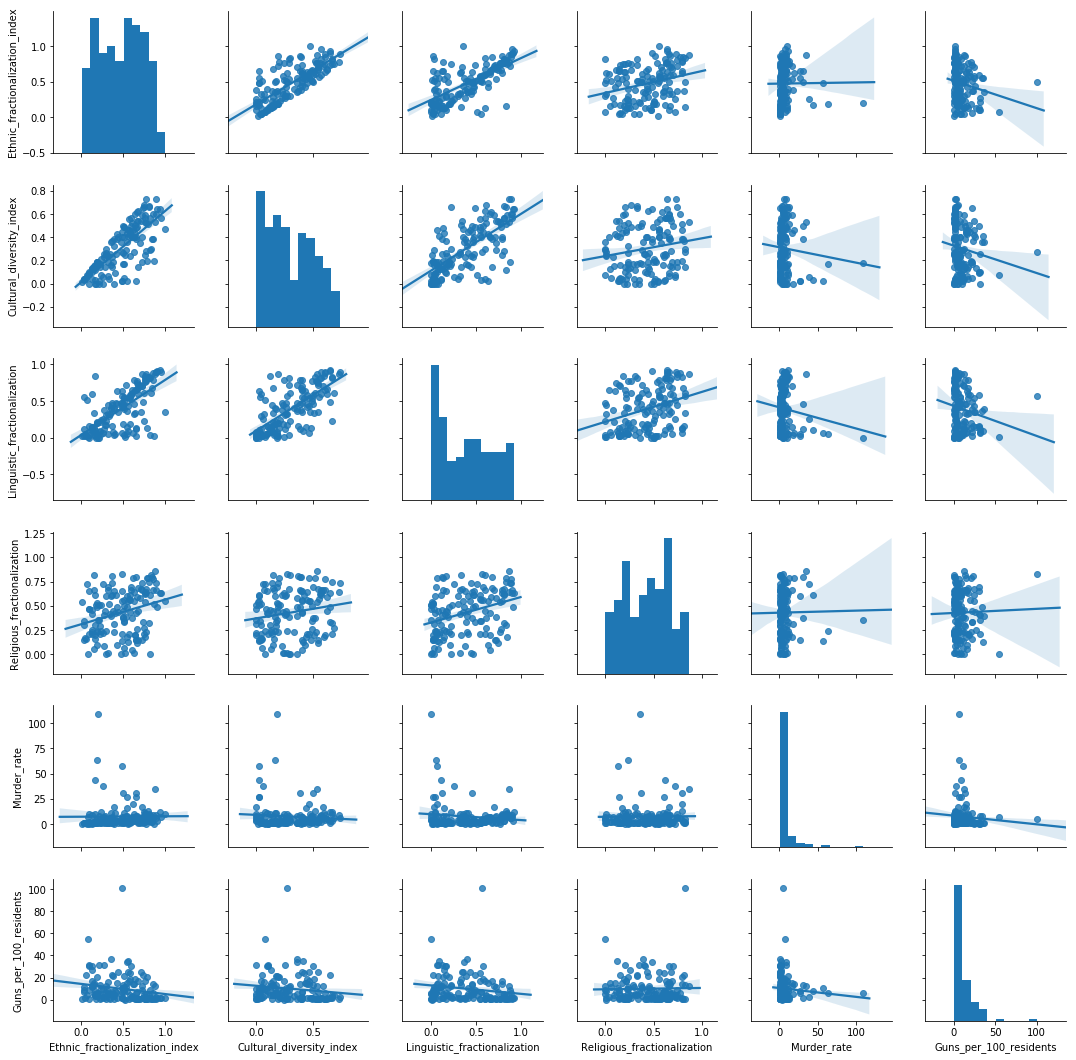

In [29]:

merge_pair_grid = sns.pairplot(merge_df[numeric_columns], kind='reg')

In [30]:

column_correlations_df = check_4_correlation(merge_df[numeric_columns], column_list=numeric_columns)
column_correlations_df.sort_values('max_correlation', ascending=False)

,first_column,second_column,max_correlation
0,Ethnic_fractionalization_index,Cultural_diversity_index,0.768347
1,Cultural_diversity_index,Linguistic_fractionalization,0.692981
2,Linguistic_fractionalization,Religious_fractionalization,0.329715
3,Religious_fractionalization,Guns_per_100_residents,0.022810


In [31]:

least_murderous = merge_df['Murder_rate'].min()

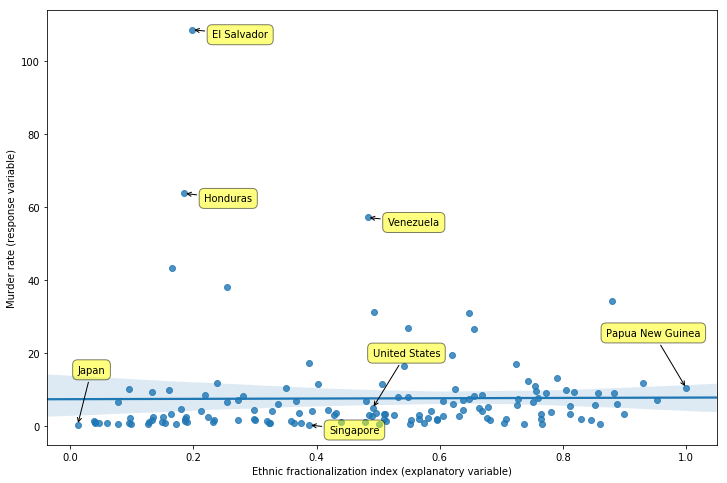

In [32]:

# First order (linear) scatterplot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig1_fig = plt.figure(figsize=(12,8))
merge_axes_subplot = sns.regplot(x='Ethnic_fractionalization_index', y='Murder_rate',
                                 scatter=True, data=merge_df)
xlabel_text = plt.xlabel('Ethnic fractionalization index (explanatory variable)')
ylabel_text = plt.ylabel('Murder rate (response variable)')
kwargs = dict(textcoords='offset points', ha='left', va='bottom',
              bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
              arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
least_fractional = merge_df['Ethnic_fractionalization_index'].min()
most_fractional = merge_df['Ethnic_fractionalization_index'].max()
for label, x, y in zip(merge_df.index, merge_df['Ethnic_fractionalization_index'],
                       merge_df['Murder_rate']):
    if (y > 50):
        annotation = plt.annotate(label, xy=(x, y), xytext=(20, -10), **kwargs)
    elif (y == least_murderous):
        annotation = plt.annotate(label, xy=(x, y), xytext=(20, -10), **kwargs)
    elif (x == least_fractional):
        annotation = plt.annotate(label, xy=(x, y), xytext=(0, 50), **kwargs)
    elif (x == most_fractional):
        annotation = plt.annotate(label, xy=(x, y), xytext=(-80, 50), **kwargs)
    elif (label == 'United States'):
        annotation = plt.annotate(label, xy=(x, y), xytext=(0, 50), **kwargs)

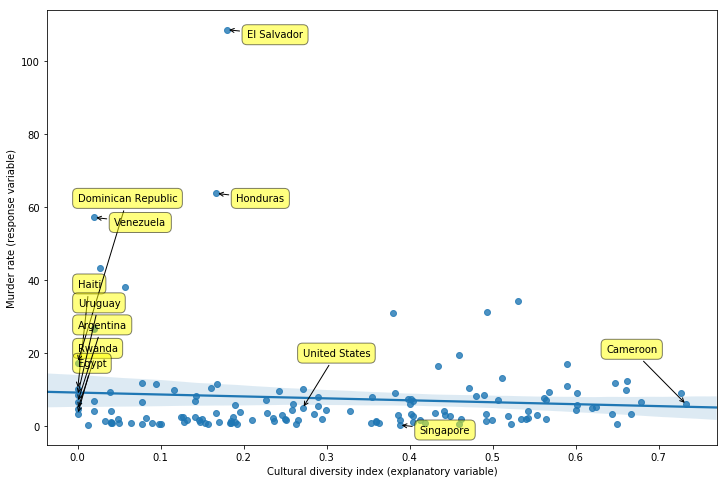

In [33]:

# First order (linear) scatterplot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig1_fig = plt.figure(figsize=(12,8))
merge_axes_subplot = sns.regplot(x='Cultural_diversity_index', y='Murder_rate',
                                 scatter=True, data=merge_df)
xlabel_text = plt.xlabel('Cultural diversity index (explanatory variable)')
ylabel_text = plt.ylabel('Murder rate (response variable)')
kwargs = dict(textcoords='offset points', ha='left', va='bottom',
              bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
              arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
least_diverse = merge_df['Cultural_diversity_index'].min()
most_diverse = merge_df['Cultural_diversity_index'].max()
for label, x, y in zip(merge_df.index, merge_df['Cultural_diversity_index'],
                       merge_df['Murder_rate']):
    if (y > 50):
        annotation = plt.annotate(label, xy=(x, y), xytext=(20, -10), **kwargs)
    elif (y == least_murderous):
        annotation = plt.annotate(label, xy=(x, y), xytext=(20, -10), **kwargs)
    elif (x == least_diverse):
        annotation = plt.annotate(label, xy=(x, y), xytext=(0, 20+y*8), **kwargs)
    elif (x == most_diverse):
        annotation = plt.annotate(label, xy=(x, y), xytext=(-80, 50), **kwargs)
    elif (label == 'United States'):
        annotation = plt.annotate(label, xy=(x, y), xytext=(0, 50), **kwargs)

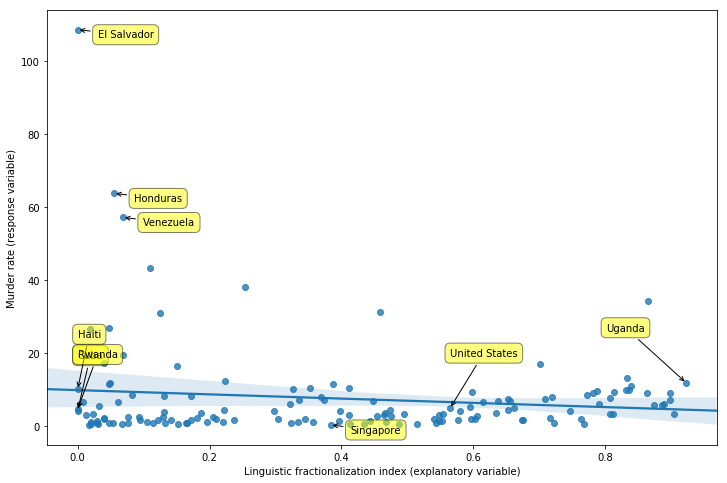

In [34]:

# First order (linear) scatterplot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig1_fig = plt.figure(figsize=(12,8))
merge_axes_subplot = sns.regplot(x='Linguistic_fractionalization', y='Murder_rate',
                                 scatter=True, data=merge_df)
xlabel_text = plt.xlabel('Linguistic fractionalization index (explanatory variable)')
ylabel_text = plt.ylabel('Murder rate (response variable)')
kwargs = dict(textcoords='offset points', ha='left', va='bottom',
              bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
              arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
least_fractional = merge_df['Linguistic_fractionalization'].min()
most_fractional = merge_df['Linguistic_fractionalization'].max()
for label, x, y in zip(merge_df.index, merge_df['Linguistic_fractionalization'],
                       merge_df['Murder_rate']):
    if (y > 50):
        annotation = plt.annotate(label, xy=(x, y), xytext=(20, -10), **kwargs)
    elif (y == least_murderous):
        annotation = plt.annotate(label, xy=(x, y), xytext=(20, -10), **kwargs)
    elif (x == least_fractional):
        annotation = plt.annotate(label, xy=(x, y), xytext=(0, 50), **kwargs)
    elif (x == most_fractional):
        annotation = plt.annotate(label, xy=(x, y), xytext=(-80, 50), **kwargs)
    elif (label == 'United States'):
        annotation = plt.annotate(label, xy=(x, y), xytext=(0, 50), **kwargs)

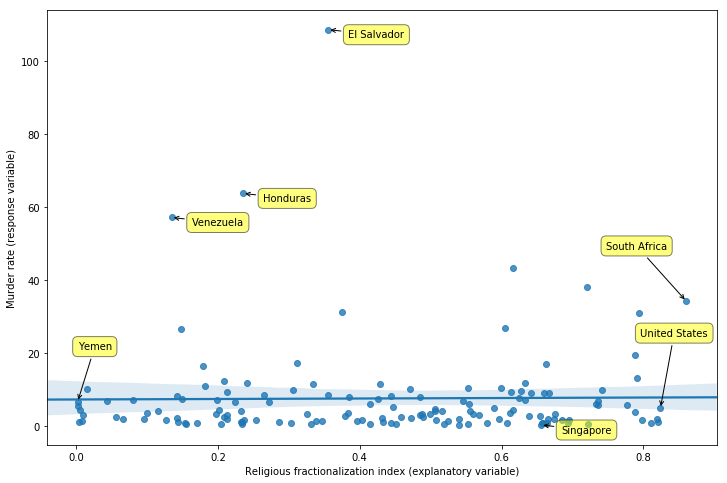

In [35]:

# First order (linear) scatterplot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig1_fig = plt.figure(figsize=(12,8))
merge_axes_subplot = sns.regplot(x='Religious_fractionalization', y='Murder_rate',
                                 scatter=True, data=merge_df)
xlabel_text = plt.xlabel('Religious fractionalization index (explanatory variable)')
ylabel_text = plt.ylabel('Murder rate (response variable)')
kwargs = dict(textcoords='offset points', ha='left', va='bottom',
              bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
              arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
least_fractional = merge_df['Religious_fractionalization'].min()
most_fractional = merge_df['Religious_fractionalization'].max()
for label, x, y in zip(merge_df.index, merge_df['Religious_fractionalization'],
                       merge_df['Murder_rate']):
    if (y > 50):
        annotation = plt.annotate(label, xy=(x, y), xytext=(20, -10), **kwargs)
    elif (y == least_murderous):
        annotation = plt.annotate(label, xy=(x, y), xytext=(20, -10), **kwargs)
    elif (x == least_fractional):
        annotation = plt.annotate(label, xy=(x, y), xytext=(0, 50), **kwargs)
    elif (x == most_fractional):
        annotation = plt.annotate(label, xy=(x, y), xytext=(-80, 50), **kwargs)
    elif (label == 'United States'):
        annotation = plt.annotate(label, xy=(x, y), xytext=(-20, 70), **kwargs)

In [36]:

file_name = r'../data/html/average-iq-by-country.html'
iq_df = pd.read_html(file_name)[0]
iq_df.columns = ['IQ_Rank', 'Country', 'IQ']
iq_df.sample(10).T

,125,161,104,70,28,179,94,102,156,30
IQ_Rank,26,37,23,19,9,41,23,23,36,9
Country,Egypt,Malawi,Panama,Mexico,Latvia,Gabon,The Bahamas,Nigeria,Rwanda,United States
IQ,81,69,84,88,98,64,84,84,70,98


In [37]:

merge_df.reset_index(level=0, inplace=True)
merge_df = pd.merge(left=merge_df, right=iq_df, how='inner', on=['Country'],
                    suffixes=('_merge', '_iq'))
merge_df.sample(10).T

,55,89,77,88,46,44,117,47,66,104
Country,Vietnam,Belgium,Algeria,Netherlands,Romania,Germany,Iran,Syria,Oman,Thailand
Ethnic_diversity_rank,122,65,111,151,112,148,44,62,91,92
Ethnic_fractionalization_index,0.233,0.567,0.32,0.077,0.3,0.095,0.669,0.581,0.439,0.431
Cultural_diversity_index,0.21,0.462,0.237,0.077,0.265,0.09,0.542,0.235,0.404,0.431
Fractionalization_rank,209,19,3,140,161,72,90,188,148,192
Ethnic_fractionalization,0.2383,0.5554,0.3394,0.1054,0.3069,0.1682,0.6684,0.5399,0.4373,0.6338
Linguistic_fractionalization,0.2377,0.5409,0.4427,0.5143,0.1723,0.1642,0.7462,0.1817,0.3567,0.6344
Religious_fractionalization,0.508,0.2127,0.0091,0.7222,0.2373,0.6571,0.1152,0.431,0.4322,0.0994
Murder_rate,1.52,1.95,1.37,0.61,1.49,0.85,4.12,2.23,1.06,3.51
Murder_count,1358,220,542,104,291,682,3259,463,34,2387


In [38]:

merge_df = merge_df.set_index(['Country'])

In [39]:

store_objects(gun_stats_df=merge_df)

Pickling to ../saves/pickle/gun_stats_df.pickle


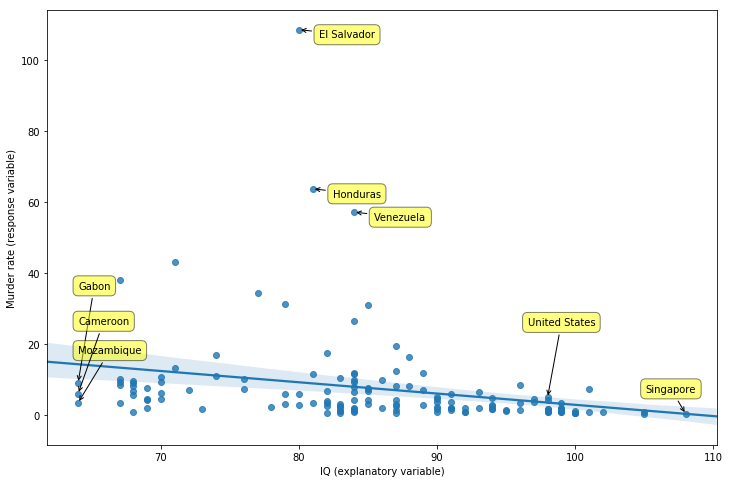

In [40]:

# First order (linear) scatterplot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig1_fig = plt.figure(figsize=(12,8))
merge_axes_subplot = sns.regplot(x='IQ', y='Murder_rate',
                                 scatter=True, data=merge_df)
xlabel_text = plt.xlabel('IQ (explanatory variable)')
ylabel_text = plt.ylabel('Murder rate (response variable)')
kwargs = dict(textcoords='offset points', ha='left', va='bottom',
              bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
              arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
dumbest = merge_df['IQ'].min()
smartest = merge_df['IQ'].max()
for label, x, y in zip(merge_df.index, merge_df['IQ'],
                       merge_df['Murder_rate']):
    if (y > 50):
        annotation = plt.annotate(label, xy=(x, y), xytext=(20, -10), **kwargs)
    elif (y == least_murderous):
        annotation = plt.annotate(label, xy=(x, y), xytext=(-40, 20), **kwargs)
    elif (x == dumbest):
        annotation = plt.annotate(label, xy=(x, y), xytext=(0, 20+y*8), **kwargs)
    elif (x == smartest):
        annotation = plt.annotate(label, xy=(x, y), xytext=(-80, 50), **kwargs)
    elif (label == 'United States'):
        annotation = plt.annotate(label, xy=(x, y), xytext=(-20, 70), **kwargs)

In [41]:

match_series = (merge_df.index == 'United States')
merge_df[match_series].T

Country,United States
Ethnic_diversity_rank,85
Ethnic_fractionalization_index,0.491
Cultural_diversity_index,0.271
Fractionalization_rank,204
Ethnic_fractionalization,0.4901
Linguistic_fractionalization,0.5647
Religious_fractionalization,0.8241
Murder_rate,4.88
Murder_count,15696
Region,Americas


In [42]:

def cn2str(column_name):
    
    return ' '.join(column_name.split('_')).lower()

country_str = 'United States'

guns_column_name = 'Guns_per_100_residents'
guns_mean = merge_df[guns_column_name].mean()
guns_std = merge_df[guns_column_name].std()
guns_us_diff = merge_df.loc[country_str, guns_column_name] - guns_mean
guns_us_ratio = guns_us_diff / guns_std
if guns_us_ratio > 0:
    guns_above_below = 'above'
else:
    guns_us_ratio = -guns_us_ratio
    guns_above_below = 'below'

murder_column_name = 'Murder_rate'
murder_mean = merge_df[murder_column_name].mean()
murder_std = merge_df[murder_column_name].std()
murder_us_diff = merge_df.loc[country_str, murder_column_name] - murder_mean
murder_us_ratio = murder_us_diff / murder_std
if murder_us_ratio > 0:
    murder_above_below = 'above'
else:
    murder_us_ratio = -murder_us_ratio
    murder_above_below = 'below'

format_str = 'The {} has a {} {:0.1f} standard deviations {} the mean, '
format_str += 'but a {} {:0.1f} standard deviations {} the mean.'
print(format_str.format(country_str, cn2str(guns_column_name), guns_us_ratio, guns_above_below,
                        cn2str(murder_column_name), murder_us_ratio, murder_above_below))

The United States has a guns per 100 residents 7.2 standard deviations above the mean, but a murder rate 0.2 standard deviations below the mean.
